<a href="https://colab.research.google.com/github/EricSnunes/AnaliseDeDados/blob/main/treinandoDadosRegressaoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   UF  Habitantes  Matriculados  Percentual1  Percentual2        Rateio
0  AC      880631        200950     0.228189     0.049409  1.334.035.71
1  AL     3220104        637934     0.198110     0.042896  1.158.188.55
2  AM     4281209        941425     0.219897     0.047613  1.285.561.07
3  AP      802837        167966     0.209216     0.045301  1.223.115.35
4  BA    14850513       2501921     0.168474     0.036479    984.930.42
         Habitantes  Matriculados  Percentual1  Percentual2
count  2.700000e+01  2.700000e+01    27.000000    27.000000
mean   7.873472e+06  1.232300e+06     0.171051     0.037037
std    9.256156e+06  1.325184e+06     0.028652     0.006204
min    7.167930e+05  1.493850e+05     0.121973     0.026410
25%    2.942356e+06  4.542140e+05     0.149241     0.032315
50%    4.145040e+06  6.803060e+05     0.163899     0.035488
75%    9.386342e+06  1.526302e+06     0.194881     0.042197
max    4.597319e+07  6.675583e+06     0.228189     0.049409
   Habitantes  Matriculados


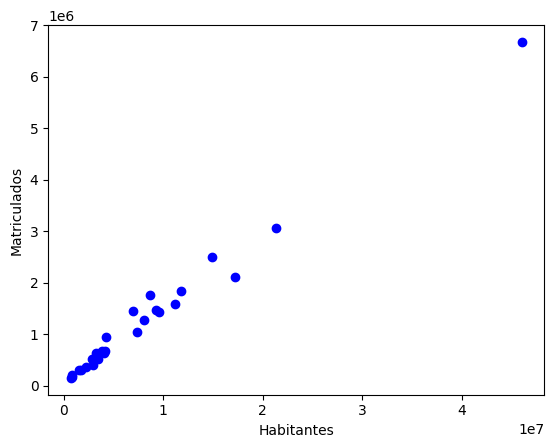

Coefficients:  [[0.17133461]]
Intercept:  [-24479.60193891]


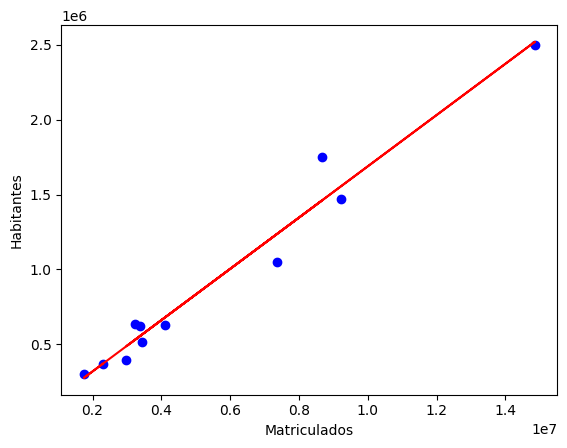

R2-score: 0.95


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

#CARREGAR OS DADOS
df = pd.read_csv('Tabela_UF.csv', encoding ='latin 1')

#EXIBIR A ESTRUTURA DO DATAFRAME
print (df.head())

#EXIBIR O RESUMO DO DATAFRAME
print (df.describe())

#SELECIONAR SOMENTE ALGUMAS FEATURES
cdf = df[['Habitantes','Matriculados']]
print (cdf.head(2))

plt.scatter (cdf.Habitantes, cdf.Matriculados, color='blue')
plt.xlabel ("Habitantes")
plt.ylabel ("Matriculados")
plt.show ()

#DIVIDIR OS DADOS EM DADOS DE TREINAMENTO E DADOS DE TESTE
msk = np.random.rand(len(df)) < 0.5
train = df[msk]
test = df[~msk]

#TREINAR O MODELO
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Habitantes']])
train_y = np.asanyarray(train[['Matriculados']])
regr.fit(train_x, train_y)

#EXIBIR OS COEFICIENTES
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

#EXIBIR A FIT LINE
plt.scatter(train.Habitantes, train.Matriculados, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.ylabel ("Habitantes")
plt.xlabel ("Matriculados")
plt.show()

#AVALIAR O MODELO
test_x = np.asanyarray(test[['Habitantes']])
test_y = np.asanyarray(test[['Matriculados']])
test_y_pred = regr.predict(test_x)

print ("R2-score: %.2f" % r2_score(test_y_pred , test_y) )